In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
nameCSV = 'hydro_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2034

In [3]:
for k in range(len(tt)):
    print wh[k], netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

2.2381179332733154 1985-04-09 08:40:00.762408
2.335000276565552 1985-05-02 10:19:42.794643
1.6103999614715576 1985-05-05 10:28:31.310936
2.806500196456909 1985-05-28 12:08:08.132813
1.6183530092239382 1985-06-26 03:00:05.350414
0.43242108821868896 1985-08-08 17:15:39.942435
1.225307822227478 1985-09-23 20:34:46.584136
1.1935999393463137 1985-11-12 00:02:04.968699
0.4020000398159027 1985-11-14 13:05:19.043750
0.2772000133991241 1985-12-10 14:53:17.146876
1.3723334074020386 1986-01-20 04:59:25.847330
1.9206666946411133 1986-01-23 05:08:08.691408
0.5419999957084656 1986-02-12 06:38:26.406249
0.54666668176651 1986-02-15 06:47:09.250327
2.8298890590667725 1986-04-02 10:05:05.468750
1.30566668510437 1986-05-18 13:22:42.188367
1.4013333320617676 1986-06-10 15:01:19.719617
0.8573750257492065 1986-07-03 16:39:51.374022
1.4612727165222168 1986-09-10 21:35:17.028408
0.4185000061988831 1986-09-16 10:47:24.924219
0.467600017786026 1986-11-13 02:02:23.975000
1.2897223234176636 1986-11-30 03:15:04.79

1.6765000820159912 2004-10-15 12:37:48.867185
0.5622666478157043 2004-10-25 00:14:41.131837
0.675000011920929 2004-10-25 10:36:20.503906
0.943666696548462 2004-10-27 13:16:48.149305
2.244133472442627 2004-10-31 23:46:52.089584
1.8912001848220823 2004-11-01 12:11:02.538020
1.1232500076293943 2004-11-04 08:34:51.730468
1.0555883646011353 2004-11-11 01:27:30.683077
0.8208461999893188 2004-11-13 14:29:36.689904
0.675000011920929 2004-11-14 06:33:23.757813
1.4818667173385618 2004-11-17 12:08:07.760938
2.8892502784729004 2004-11-24 04:31:54.896485
2.1706666946411133 2004-11-28 02:40:18.631379
1.310785889625549 2004-11-30 15:42:25.239954
1.3077501058578491 2004-12-04 02:30:25.919922
1.20086669921875 2004-12-05 23:46:49.607292
1.22433340549469 2004-12-06 12:10:59.607812
0.7800000309944153 2004-12-14 00:28:58.041991
0.6845000386238098 2004-12-15 03:53:14.746092
1.8201540708541868 2004-12-17 16:55:14.177884
1.1212000846862793 2004-12-22 12:08:04.117186
0.9910000562667848 2004-12-23 22:27:29.7109

2.858285631452288 2013-07-13 08:53:31.604910
2.4270557827419705 2013-07-15 08:50:59.252170
2.1048001607259117 2013-07-18 20:31:57.401041
1.2399444580078125 2013-07-20 20:29:29.647569
1.2063501358032227 2013-07-21 20:09:15.186719
1.4470001220703126 2013-07-31 18:07:46.078906
1.0582500457763673 2013-08-10 16:06:16.728907
0.8577778074476454 2013-08-11 07:28:20.567708
1.3177222145928278 2013-08-16 19:06:49.278646
1.7180000940958662 2013-08-20 14:04:49.568750
1.6304762704031808 2013-08-31 10:43:12.480282
1.4684444003634982 2013-09-09 06:03:14.492188
0.5507778061760796 2013-09-14 17:41:49.486111
0.6761500358581543 2013-09-19 08:00:25.618750
0.9159564971923828 2013-09-30 02:40:32.412024
1.0277778837415907 2013-10-09 03:57:28.714410
1.1445882460650276 2013-10-13 16:16:46.612133
1.592549991607666 2013-10-19 01:55:59.567870
1.332400131225586 2013-10-28 23:54:30.478906
0.9742942136876724 2013-11-04 03:15:39.000574
1.3797000885009765 2013-11-07 21:53:02.704687
1.062888993157281 2013-11-09 14:54:10

In [4]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


In [5]:
y1985 = []
y1986 = []
y1987 = []
y1988 = []
y1992 = []
y1993 = []
y1994 = []
y1995 = []
y1996 = []
y1997 = []
y1998 = []
y1999 = []
y2000 = []
y2001 = []
y2002 = []
y2003 = []
y2004 = []
y2005 = []
y2006 = []
y2007 = []
y2008 = []
y2009 = []
y2010 = []
y2011 = []
y2012 = []
y2013 = []
y2014 = []
y2015 = []
y2016 = []
y2017 = []
y2018 = []



for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    if dt.year == 1985:
        y1985.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1986:
        y1986.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1987:
        y1987.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1988:
        y1988.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1992:
        y1992.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1993:
        y1993.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1994:
        y1994.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1995:
        y1995.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1996:
        y1996.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1997:
        y1997.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1998:
        y1998.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1999:
        y1999.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2000:
        y2000.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2001:
        y2001.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2002:
        y2002.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2003:
        y2003.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2004:
        y2004.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2005:
        y2005.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2006:
        y2006.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2007:
        y2007.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2008:
        y2008.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2009:
        y2009.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2010:
        y2010.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2011:
        y2011.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2012:
        y2012.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2013:
        y2013.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2014:
        y2014.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2015:
        y2015.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2016:
        y2016.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2017:
        y2017.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2018:
        y2018.append(np.mean(wh[days[k]:days[k+1]]))

In [6]:
overall = [
np.mean(y1985), 
np.mean(y1986),
np.mean(y1987),
np.mean(y1988),
np.mean(y1992),
np.mean(y1993),
np.mean(y1994),
np.mean(y1995),
np.mean(y1996),
np.mean(y1997),
np.mean(y1998),
np.mean(y1999),
np.mean(y2000),
np.mean(y2001),
np.mean(y2002),
np.mean(y2003),
np.mean(y2004),
np.mean(y2005),
np.mean(y2006),
np.mean(y2007),
np.mean(y2008),
np.mean(y2009),
np.mean(y2010),
np.mean(y2011),
np.mean(y2012),
np.mean(y2013),
np.mean(y2014),
np.mean(y2015),
np.mean(y2016),
np.mean(y2017),
np.mean(y2018)]

label = [
'1985',
'1986',
'1987',
'1988',
'1992',
'1993',
'1994',
'1995',
'1996',
'1997',
'1998',
'1999',
'2000',
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
'2009',
'2010',
'2011',
'2012',
'2013',
'2014',
'2015',
'2016',
'2017',
'2018']

stdev = [
np.std(y1985),
np.std(y1986),
np.std(y1987),
np.std(y1988),
np.std(y1992),
np.std(y1993),
np.std(y1994),
np.std(y1995),
np.std(y1996),
np.std(y1997),
np.std(y1998),
np.std(y1999),
np.std(y2000),
np.std(y2001),
np.std(y2002),
np.std(y2003),
np.std(y2004),
np.std(y2005),
np.std(y2006),
np.std(y2007),
np.std(y2008),
np.std(y2009),
np.std(y2010),
np.std(y2011),
np.std(y2012),
np.std(y2013),
np.std(y2014),
np.std(y2015),
np.std(y2016),
np.std(y2017),
np.std(y2018)]

print len(overall)
print len(label)
print len(stdev)


31
31
31


## Overall mean Hs for Hydrographers 1985-2019: 

In [7]:
np.mean(overall)

1.529611760188608

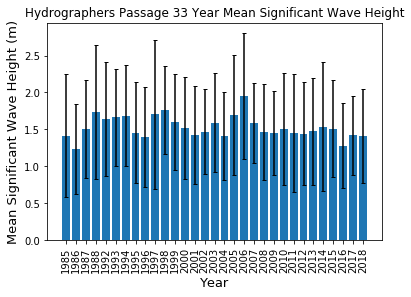

[6.0, 4.0]


In [8]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Hydrographers Passage 33 Year Mean Significant Wave Height')
plt.errorbar
plt.savefig('Hydrographers Passage 33 Year Mean Significant Wave Height')
plt.show()

fig_size = plt.rcParams["figure.figsize"]
print fig_size

In [9]:
years= [
1985,
1986,
1987,
1988,
1992,
1993,
1994,
1995,
1996,
1997,
1998,
1999,
2000,
2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014,
2015,
2016,
2017,
2018]

In [10]:
import scipy
x = years
y=overall
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

print 'r2',(r_value**2)
print 'p',(p_value)
print 'std error',(std_err)
print 'slope',(slope)
print 'intercept',intercept

r2 0.034376392353244606
p 0.3179968962940144
std error 0.002799398293920676
slope -0.0028443949823028234
intercept 7.2258338536189815


Text(0.5,1,'Hydro Linear Regression 33 Years')

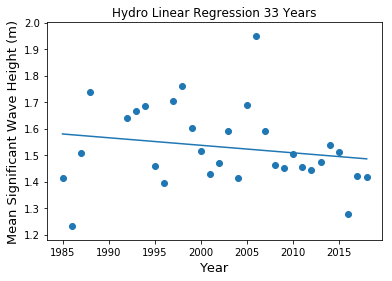

In [12]:
plt.scatter(x,y)
xmin=x[0]
xmax=x[-1]
plt.plot([xmin,xmax],[slope*xmin+intercept, slope*xmax+intercept])
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Hydro Linear Regression 33 Years')